# OpenCVで顔検出と瞳検出（顔認識、瞳認識）デモ
https://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## 学習済みカスケード型分類器の読み込み
https://github.com/opencv/opencv/tree/master/data/haarcascades

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

## 画像ファイル読み込み

(466, 700, 3)


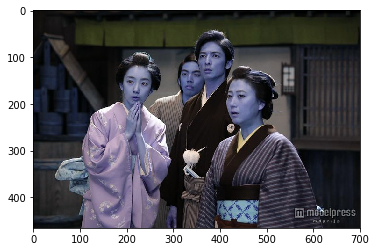

In [3]:
img = cv2.imread('./pics/haru03.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

## 画像変換（グレー化）

(466, 700)


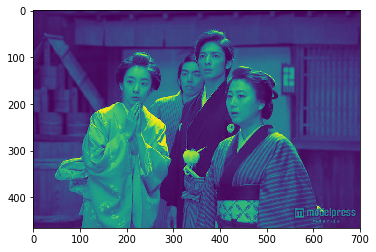

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray)
plt.show()

## 顔検出
検出領域の(左上の点のx座標, y座標, 幅, 高さ)のリスト（配列）

In [7]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[307 113  60  60]
 [184 125  77  77]
 [344  71  68  68]
 [396 151  89  89]]


## 瞳検出、枠描画

In [8]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

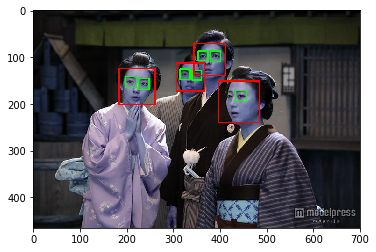

In [9]:
plt.imshow(img)
plt.show()